***Conditional Tabular GANS***

In [ ]:
# connect to google drive to import data

from google.colab import drive

#need to input a key to connect to your drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd 
import matplotlib
df = pd.read_csv('/content/drive/My Drive/trans.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_id    1048575 non-null  int64  
 1   account_id  1048575 non-null  int64  
 2   date        1048575 non-null  int64  
 3   type        1048575 non-null  object 
 4   operation   869912 non-null   object 
 5   amount      1048575 non-null  float64
 6   balance     1048575 non-null  float64
 7   k_symbol    569929 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 64.0+ MB


In [ ]:
df.describe()

,trans_id,account_id,date,amount,balance
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.327034e+06,2.936277e+03,9.655599e+05,5.942088e+03,3.845673e+04
std,1.222294e+06,2.477151e+03,1.393231e+04,9.529394e+03,2.206851e+04
min,1.000000e+00,1.000000e+00,9.301010e+05,0.000000e+00,-4.112570e+04
25%,4.280845e+05,1.204000e+03,9.601130e+05,1.359000e+02,2.238840e+04
50%,8.554380e+05,2.434000e+03,9.704060e+05,2.100000e+03,3.309880e+04
75%,1.982606e+06,3.659000e+03,9.802120e+05,6.817000e+03,4.950220e+04
max,3.682986e+06,1.138200e+04,9.812190e+05,8.740000e+04,2.096370e+05


**Importing the csv file using pandas library**

*Loading the dataset to df and displaying the dataset information such as number of rows and columns, name of the columns and its datatypes*

In [ ]:
import pandas as pd
import matplotlib
df = pd.read_csv("trans.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_id    1048575 non-null  int64  
 1   account_id  1048575 non-null  int64  
 2   date        1048575 non-null  int64  
 3   type        1048575 non-null  object 
 4   operation   869912 non-null   object 
 5   amount      1048575 non-null  float64
 6   balance     1048575 non-null  float64
 7   k_symbol    569929 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 64.0+ MB


***Displaying the First-five observations of the dataset***

In [ ]:
df.head()
df.describe()

,trans_id,account_id,date,type,operation,amount,balance,k_symbol
0,695247,2378,930101,PRIJEM,VKLAD,700.0,700.0,unspecified
1,171812,576,930101,PRIJEM,VKLAD,900.0,900.0,unspecified
2,207264,704,930101,PRIJEM,VKLAD,1000.0,1000.0,unspecified
3,1117247,3818,930101,PRIJEM,VKLAD,600.0,600.0,unspecified
4,579373,1972,930102,PRIJEM,VKLAD,400.0,400.0,unspecified


**Installing the ctgan package using pip command**

*It directly installs the latest version of conditional GANS package from Python Package Index, which is a repository for Python programming language software*



In [ ]:
pip install ctgan

     |████████████████████████████████| 10.4MB 4.0MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.25.3 which is incompatible.
  Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5


**Data Preparation**

*Checking for Missing values*

In [ ]:
#Checking Null values in each column
df.isnull().sum()

trans_id           0
account_id         0
date               0
type               0
operation     178663
amount             0
balance            0
k_symbol      478646
dtype: int64

*Replacing the missing values*

In [ ]:
# Filling the Missing values with 'Unspecified'
df = df.fillna(value='unspecified') 

# Removing the space from the 'k_symbol', so the following code replaces the 'space' with 'unspecified'
df = df.replace(' ', 'unspecified')

*Checking for Duplicate values*

In [ ]:
#Checking for Duplicate values
print(f'Duplicate values = {df.duplicated().sum()}')

Duplicate values = 0


In [ ]:
#Checking Null values in each column
df.isnull().sum()

trans_id      0
account_id    0
date          0
type          0
operation     0
amount        0
balance       0
k_symbol      0
dtype: int64

*Taking a random sample of 1000 observations from the dataset and loading it into prepared. If we consider more number of  samples, the session will crash due to RAM memory size is 12 GB maximum (session crashes while fitting the model)*

In [ ]:
prepared=df.sample(n=1000, replace=False, random_state=1)  
prepared.shape

(1000, 8)

In [ ]:
# Creating a list with the name of columns which will be used later to fit the model
discrete_columns = ['trans_id','account_id','date','amount','balance','type','operation','k_symbol']

**Preparation of CTGANS model**

In [ ]:
# Importing the CTGAN synthesizer model from the ctgan library package
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer()

In [ ]:
# Fitting the model with the prepared data and the list of columns ( with 10 epochs ) 

ctgan.fit(prepared, discrete_columns, epochs=10)

Epoch 1, Loss G: 4.9018, Loss D: -0.0023
Epoch 2, Loss G: 4.8369, Loss D: -0.0194
Epoch 3, Loss G: 4.8564, Loss D: -0.0326
Epoch 4, Loss G: 4.7990, Loss D: -0.0493
Epoch 5, Loss G: 4.8821, Loss D: -0.0636
Epoch 6, Loss G: 4.9133, Loss D: -0.0766
Epoch 7, Loss G: 4.7792, Loss D: -0.0778
Epoch 8, Loss G: 5.0002, Loss D: -0.0852
Epoch 9, Loss G: 4.7681, Loss D: -0.0838
Epoch 10, Loss G: 4.8619, Loss D: -0.1032


**Synthetic Data Generation**

In [ ]:
#Generating the synthetic data from the ctgan fitted model 
#1 lakh rows are generated

new_data = ctgan.sample(100000)

In [ ]:
new_data.head

<bound method NDFrame.head of       trans_id account_id    date  ...  amount  balance     k_symbol
0       904893        827  970225  ...    3600  35485.9     POJISTNE
1      1041419         56  940207  ...    6509  25052.2     POJISTNE
2         1160         88  971016  ...   101.2  20187.2  unspecified
3      3644252        415  940729  ...  3016.7  20853.2  SANKC. UROK
4       486272       4082  950109  ...    2700    15009  SANKC. UROK
...        ...        ...     ...  ...     ...      ...          ...
99995  3537520        757  960710  ...    4800  37794.9       SLUZBY
99996    23658       1251  980603  ...    5760  46182.8         SIPO
99997    41372       8114  950307  ...   31100  38752.8         UROK
99998  3593973       1423  951030  ...    85.9    34320  unspecified
99999   131797       6273  970615  ...    5760  23052.8         UROK

[100000 rows x 8 columns]>

In [ ]:
new_data['amount'].mean()

8326.885631999929

In [ ]:
new_data['amount'].std()

11259.614137637322

In [ ]:
new_data['balance'].mean()

38855.07505500186

In [ ]:
new_data['balance'].std()

22755.141000317246

**Comparison of Original data and Synthetic Data**

***1. Using Density plots for Numerical variables and Histograms for Categorical variables***

***Density plots for Trans_id and Account_id columns***




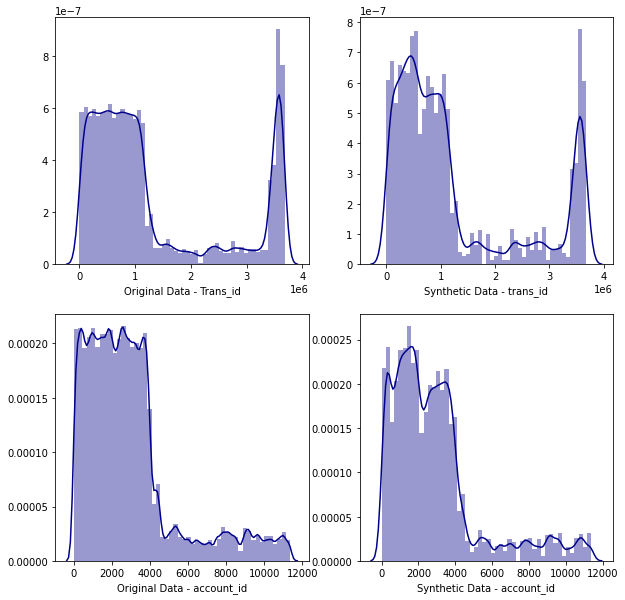

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# (Trans_id and Account_id variable)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.distplot(df.trans_id , color="darkblue", ax=axes[0,0], axlabel='Original Data - Trans_id')
sns.distplot(new_data.trans_id , color="darkblue", ax=axes[0,1], axlabel='Synthetic Data - trans_id')

sns.distplot(df.account_id , color="darkblue", ax=axes[1,0], axlabel='Original Data - account_id')
sns.distplot(new_data.account_id , color="darkblue", ax=axes[1,1], axlabel='Synthetic Data - account_id')


plt.show();

***Density plots for Balance and Amount columns***

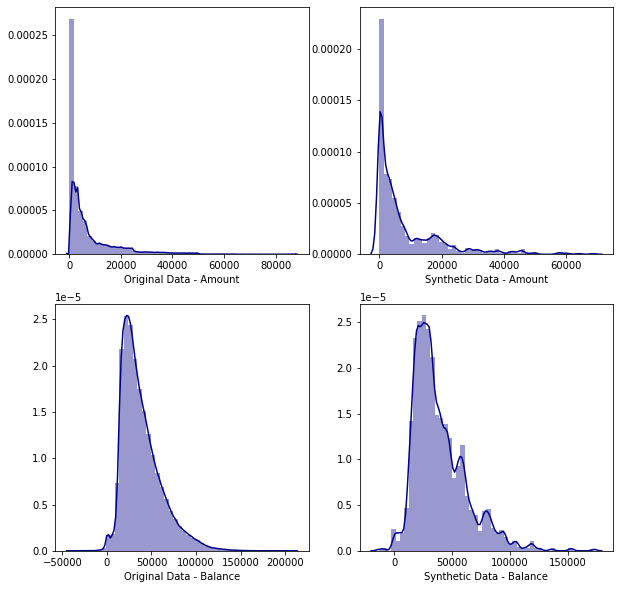

In [ ]:
## Density plot - (Balance and Amount variable)
 
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.distplot(df.amount , color="darkblue", ax=axes[0,0], axlabel='Original Data - Amount')
sns.distplot(new_data.amount , color="darkblue", ax=axes[0,1], axlabel='Synthetic Data - Amount')

sns.distplot(df.balance, color="darkblue", ax=axes[1,0], axlabel='Original Data - Balance')
sns.distplot(new_data.balance, color="darkblue", ax=axes[1,1], axlabel='Synthetic Data - Balance')
plt.show();

# The data distribution of the Original data and the generated data looks similar.

***Density plot for Date column***

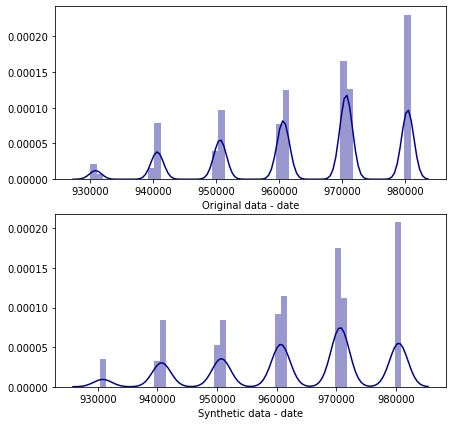

In [ ]:
fig, axes = plt.subplots(2 ,figsize=(7, 7))
sns.distplot(df.date , color="darkblue", ax=axes[0], axlabel='Original data - date')
sns.distplot(new_data.date , color="darkblue", ax=axes[1], axlabel='Synthetic data - date')

***Histogram for Type column***

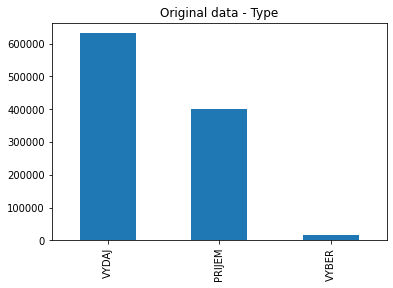

In [ ]:
# Type column - Original Data 
df['type'].value_counts().plot(kind='bar',title = 'Original data - Type')


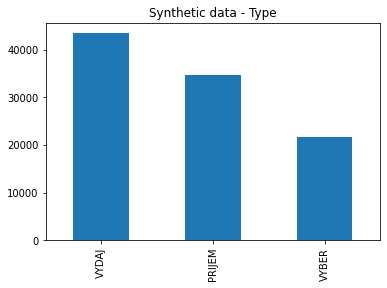

In [ ]:
# Type column - Synthetic data 
new_data['type'].value_counts().plot(kind='bar', title = 'Synthetic data - Type')

***Histograms for Operation Column***

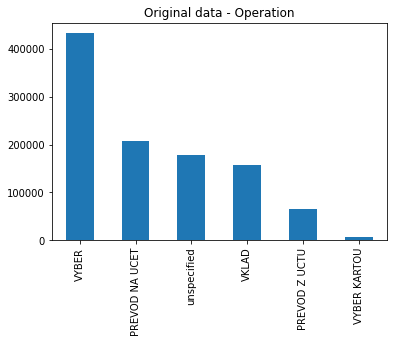

In [ ]:
# Operation column - Original Data
df['operation'].value_counts().plot(kind='bar',title = 'Original data - Operation')

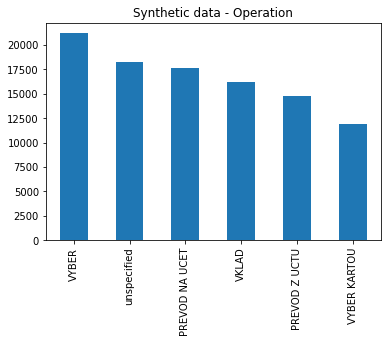

In [ ]:
# Operation column - Synthetic Data
new_data['operation'].value_counts().plot(kind='bar',title = 'Synthetic data - Operation')

***Histograms for k_symbol variable***

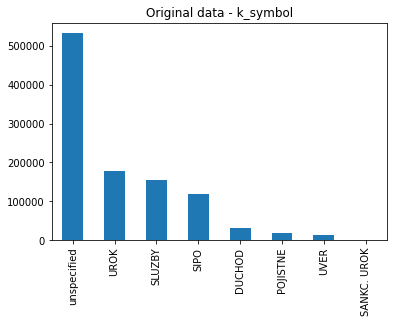

In [ ]:
# K_symbol - Original data
df['k_symbol'].value_counts().plot(kind='bar',title = 'Original data - k_symbol')

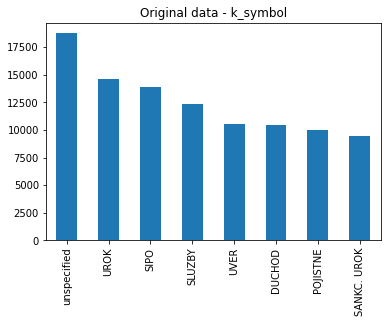

In [ ]:
# k_symbol - Synthetic data
new_data['k_symbol'].value_counts().plot(kind='bar',title = 'Original data - k_symbol')

***2. Kullback - Leibler Divergence Test***

*(trained from 10 epochs)*

In [ ]:
# KL Divergence for 'Type' column
df['type'].value_counts(ascending = True)

VYBER      16471
PRIJEM    400209
VYDAJ     631895
Name: type, dtype: int64

In [ ]:
new_data['type'].value_counts(ascending = True)

VYBER     14444
PRIJEM    37083
VYDAJ     48473
Name: type, dtype: int64

P=1.000 Q=1.000


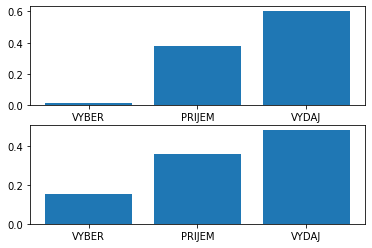

In [ ]:
from matplotlib import pyplot
type = ['VYBER', 'PRIJEM', 'VYDAJ']
p = [16471/1048575, 400209/1048575, 631895/1048575]
q = [ 15163/100000, 36251/100000, 48586/100000]
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)
pyplot.bar(type, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(type, q)
# show the plot
pyplot.show()

In [ ]:
from math import log2
# calculate the kl divergence
def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

In [ ]:
# calculate (P || Q)
kl_pq = kl_divergence(p, q) 
print(kl_pq)

0.16422186672618913


In [ ]:
# calculate (Q||P)
kl_qp = kl_divergence(q,p)
print(kl_qp)

0.3180804258146898


***KL Divergence test for Operation column***

In [ ]:
# KL Divergence for 'Operation' column

df['operation'].value_counts(ascending = True)

VYBER KARTOU        7706
PREVOD Z UCTU      65226
VKLAD             156320
unspecified       178663
PREVOD NA UCET    208283
VYBER             432377
Name: operation, dtype: int64

In [ ]:
new_data['operation'].value_counts(ascending = True)

VYBER KARTOU       8481
PREVOD Z UCTU     13223
VKLAD             14368
unspecified       16422
PREVOD NA UCET    20525
VYBER             26981
Name: operation, dtype: int64

P=1.000 Q=1.000


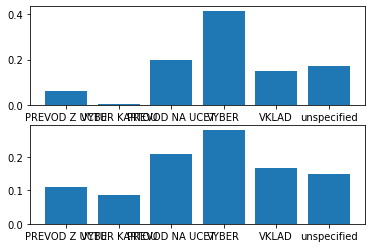

In [ ]:
from matplotlib import pyplot
operation = ['PREVOD Z UCTU','VYBER KARTOU','PREVOD NA UCET','VYBER','VKLAD','unspecified']    #not including outliers (unspecified operation and operation)
p = [65226/1048575, 7706/1048575, 208283/1048575, 432377/1048575, 156320/1048575, 178663/1048575]
q = [10919/100000, 8662/100000, 20730/100000, 28065/100000, 16685/100000, 14939/100000]  
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)
pyplot.bar(operation, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(operation, q)
# show the plot
pyplot.show()

In [ ]:
from math import log2
# calculate the kl divergence
def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

In [ ]:
# calculate (P || Q)
kl_pq = kl_divergence(p, q) 
print(kl_pq)

0.14810648462984366


In [ ]:
# calculate (Q||P)
kl_qp = kl_divergence(q,p)
print(kl_qp)

0.2526740525960668


***KL Divergence Test for k_symbol column***

In [ ]:
# KL Divergence - 'k_symbol' column
df['k_symbol'].value_counts(ascending = True)

SANKC. UROK      1527
UVER            13580
POJISTNE        18500
DUCHOD          30338
SIPO           118057
SLUZBY         155832
UROK           178663
unspecified    532078
Name: k_symbol, dtype: int64

In [ ]:
new_data['k_symbol'].value_counts(ascending = True)

SANKC. UROK     6391
UVER            7933
POJISTNE        8229
DUCHOD          9188
SLUZBY         13075
SIPO           13985
UROK           16421
unspecified    24778
Name: k_symbol, dtype: int64

P=1.000 Q=1.000


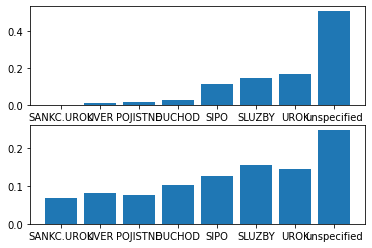

In [ ]:
from matplotlib import pyplot
k_symbol = ['SANKC.UROK', 'UVER','POJISTNE','DUCHOD','SIPO','SLUZBY','UROK','unspecified']                     
p = [1527/1048575, 13580/1048575, 18500/1048575, 30338/1048575, 118057/1048575, 155832/1048575, 178663/1048575, 532078/1048575]
q = [6763/100000, 8190/100000, 7493/100000, 10159/100000, 12579/100000, 15611/100000, 14417/100000, 24788/100000]
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)
pyplot.bar(k_symbol, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(k_symbol, q)
# show the plot
pyplot.show()

In [ ]:
from math import log2
# calculate the kl divergence
def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

In [ ]:
# calculate (P || Q)
kl_pq = kl_divergence(p, q) 
print(kl_pq)

0.4052095920941371


In [ ]:
# calculate (Q||P)
kl_qp = kl_divergence(q,p)
print(kl_qp)

0.6730819435995066


***Fitting the model with 25 epochs to check if it improves the synthetic data output***

In [ ]:
# Fitting the model with the prepared data and the list of columns ( with 25 epochs ) 

ctgan.fit(prepared, discrete_columns, epochs=25)

Epoch 1, Loss G: 4.5674, Loss D: -0.0063
Epoch 2, Loss G: 4.8818, Loss D: -0.0178
Epoch 3, Loss G: 4.7266, Loss D: -0.0351
Epoch 4, Loss G: 4.7461, Loss D: -0.0461
Epoch 5, Loss G: 4.7299, Loss D: -0.0631
Epoch 6, Loss G: 4.6442, Loss D: -0.0681
Epoch 7, Loss G: 4.6105, Loss D: -0.0819
Epoch 8, Loss G: 4.8435, Loss D: -0.1067
Epoch 9, Loss G: 4.5467, Loss D: -0.1057
Epoch 10, Loss G: 4.6904, Loss D: -0.1075
Epoch 11, Loss G: 4.9066, Loss D: -0.1207
Epoch 12, Loss G: 4.7855, Loss D: -0.0913
Epoch 13, Loss G: 4.5128, Loss D: -0.1199
Epoch 14, Loss G: 4.5266, Loss D: -0.0984
Epoch 15, Loss G: 4.5468, Loss D: -0.1136
Epoch 16, Loss G: 4.6490, Loss D: -0.0994
Epoch 17, Loss G: 4.6049, Loss D: -0.0809
Epoch 18, Loss G: 4.5188, Loss D: -0.0844
Epoch 19, Loss G: 4.7719, Loss D: -0.0942
Epoch 20, Loss G: 4.5596, Loss D: -0.0605
Epoch 21, Loss G: 4.8925, Loss D: -0.0792
Epoch 22, Loss G: 4.6701, Loss D: -0.0579
Epoch 23, Loss G: 4.5939, Loss D: -0.0526
Epoch 24, Loss G: 4.6552, Loss D: -0.0512
E

In [ ]:
#Generating the synthetic data from the ctgan fitted model 
#1 lakh rows are generated

new_data = ctgan.sample(100000)


***Checking the KL Divergence test score for synthetic data that are trained from 25 epochs***

*If the KL Divergence test score is less, then it indicates that there is more similarity between the Original data and the Synthetic data*

In [ ]:
# KL Divergence for 'Type' column
df['type'].value_counts(ascending = True)

VYBER      16471
PRIJEM    400209
VYDAJ     631895
Name: type, dtype: int64

In [ ]:
new_data['type'].value_counts(ascending = True)

VYBER      6010
PRIJEM    34747
VYDAJ     59243
Name: type, dtype: int64

P=1.000 Q=1.000


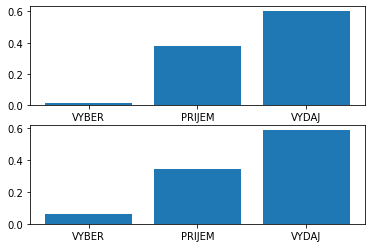

In [ ]:
from matplotlib import pyplot
type = ['VYBER', 'PRIJEM', 'VYDAJ']
p = [16471/1048575, 400209/1048575, 631895/1048575]
q = [ 6010/100000, 34747/100000, 59243/100000]
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)
pyplot.bar(type, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(type, q)
# show the plot
pyplot.show()

In [ ]:
from math import log2
# calculate the kl divergence
def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

# calculate (P || Q)
kl_pq = kl_divergence(p, q) 
print(kl_pq)

0.036113480162212816


In [ ]:
# KL Divergence for 'Operation' column

df['operation'].value_counts(ascending = True)

VYBER KARTOU        7706
PREVOD Z UCTU      65226
VKLAD             156320
unspecified       178663
PREVOD NA UCET    208283
VYBER             432377
Name: operation, dtype: int64

In [ ]:
new_data['operation'].value_counts(ascending = True)

VYBER KARTOU       3423
PREVOD Z UCTU      6891
unspecified       11970
VKLAD             13543
PREVOD NA UCET    21849
VYBER             42324
Name: operation, dtype: int64

P=1.000 Q=1.000


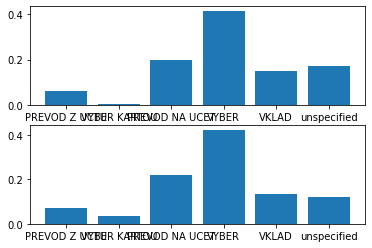

In [ ]:
from matplotlib import pyplot
operation = ['PREVOD Z UCTU','VYBER KARTOU','PREVOD NA UCET','VYBER','VKLAD','unspecified']    #not including outliers (unspecified operation and operation)
p = [65226/1048575, 7706/1048575, 208283/1048575, 432377/1048575, 156320/1048575, 178663/1048575]
q = [6891/100000, 3423/100000, 21849/100000, 42324/100000, 13543/100000, 11970/100000]  
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)
pyplot.bar(operation, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(operation, q)
# show the plot
pyplot.show()

In [ ]:
from math import log2
# calculate the kl divergence
def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

# calculate (P || Q)
kl_pq = kl_divergence(p, q) 
print(kl_pq)


0.03913065897162734


In [ ]:
# KL Divergence - 'k_symbol' column
df['k_symbol'].value_counts(ascending = True)

SANKC. UROK      1527
UVER            13580
POJISTNE        18500
DUCHOD          30338
SIPO           118057
SLUZBY         155832
UROK           178663
unspecified    532078
Name: k_symbol, dtype: int64

In [ ]:
new_data['k_symbol'].value_counts(ascending = True)

SANKC. UROK     2308
POJISTNE        3291
UVER            3301
DUCHOD          3871
SLUZBY          7325
SIPO            7877
UROK            9343
unspecified    62684
Name: k_symbol, dtype: int64

P=1.000 Q=1.000


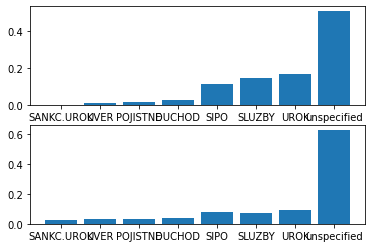

In [ ]:
from matplotlib import pyplot
k_symbol = ['SANKC.UROK', 'UVER','POJISTNE','DUCHOD','SIPO','SLUZBY','UROK','unspecified']                     
p = [1527/1048575, 13580/1048575, 18500/1048575, 30338/1048575, 118057/1048575, 155832/1048575, 178663/1048575, 532078/1048575]
q = [2308/100000, 3301/100000, 3291/100000, 3871/100000, 7877/100000, 7325/100000, 9343/100000, 62684/100000]
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)
pyplot.bar(k_symbol, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(k_symbol, q)
# show the plot
pyplot.show()

In [ ]:
from math import log2
# calculate the kl divergence
def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))
# calculate (P || Q)
kl_pq = kl_divergence(p, q) 
print(kl_pq)


0.15138671291205028


***Tabular/Table GANS***